<h1><center> IDENTIFYING THE GENDER OF A VOICE USING MACHINE LEARNING<h1>

                                                                                                  -Avinash Shan Monteiro

<img align="center" src="https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fspecials-images.forbesimg.com%2Fdam%2Fimageserve%2F939119258%2F960x0.jpg%3Ffit%3Dscale" />

## Table of Contents

1. [Introduction](#section1)<br>
    - 1.1[Data Set Information](#section11)<br>
2. [Problem Statement](#section2)<br>
3. [Selecting the important Python libraries](#section3)<br>
4. [Data Loading and Description](#section4)<br>
    - 4.1[Data Loading](#section41)<br> 
    - 4.2[Description of the data](#section42)<br> 
    - 4.3[Data Cleaning](#section43)<br>
5. [Exploratory Data Analysis](#section5)<br>
    - 5.1[Re-engineering the Target Variable column](#section51)<br>
    - 5.2[Understanding the Distribution of independent variables](#section52)<br>
    - 5.3[Target Variable Analysis](#section53)<br>
    - 5.4[Pandas Profiling](#section54)<br>
    - 5.5[Cleaning the data from the results of pandas profiling](#section55)<br>
6. [Dimensionality Reduction](#section6)<br>
    - 6.1[Variance Method](#section61)<br>
    - 6.2[Scaling the dataset](#section62)<br>
    - 6.3[Principal Components Analysis](#section63)<br>
7. [Train Test Split](#section7)<br>
8. [Machine Learning Models](#section8)<br>
    - 8.1[Logistic Regression](#section81)<br>
        - 8.1.1[Model Development](#section811)<br>
        - 8.1.2[Devoloping Model Evaluation technique](#section812)<br>
        - 8.1.3[AUC ROC curve](#section813)<br>
        - 8.1.4[Hyperparameter Tuning](#section814)<br>
        - 8.1.5[Model Evaluation](#section815)<br>
        - 8.1.6[Model Summary](#section816)<br>
    - 8.2[Decision Tree](#section82)<br>
        - 8.2.1[Model Development](#section821)<br>
        - 8.2.2[Hyperparameter Tuning](#section824)<br>
        - 8.2.3[Model Evaluation](#section823)<br>
        - 8.2.4[Model Summary](#section824)<br>
    - 8.3[Random Forest Regression](#section83)<br>
        - 8.3.1[Model Development](#section831)<br>
        - 8.3.2[Hyperparameter Tuning](#section834)<br>
        - 8.3.3[Model Evaluation](#section833)<br>
        - 8.3.4[Model Summary](#section834)<br>
    - 8.4[Naive Bayes Classifier](#section84)<br>
        - 8.4.1[Checking for Assumption for Naive Bayes](#section841)<br>
        - 8.4.2[Model Development](#section842)<br>
        - 8.4.3[Hyperparameter Tuning](#section843)<br>
        - 8.4.4[Model Evaluation](#section844)<br>
        - 8.4.5[Model Summary](#section845)<br>
    - 8.5[Support Vector Classifier](#section85)<br>
        - 8.5.1[Model Development](#section851)<br>
        - 8.5.2[Hyperparameter Tuning](#section852)<br>
        - 8.5.3[Model Evaluation](#section853)<br>
        - 8.5.4[Model Summary](#section854)<br>   
    - 8.6[K Nearest Neighbor](#section86)<br>
        - 8.6.1[Model Development](#section861)<br>
        - 8.6.2[Hyperparameter Tuning](#section862)<br>
        - 8.6.3[Tuning for nearest K neighbors for maximum accuracy](#section863)<br>
        - 8.6.4[Model Evaluation](#section864)<br>
        - 8.6.5[Model Summary](#section865)<br> 
9. [Final Summary](#section9)<br>        


# 1. INTRODUCTION
<a id=section1></a>

Determining a person’s gender as male or female, based upon a sample of their voice seems to initially be an easy task. Often, the human ear can easily detect the difference between a male or female voice within the first few spoken words. However, designing a computer program to do this turns out to be a bit trickier.

<img align="center" src='https://raw.githubusercontent.com/Avinash-Monteiro/Machine_Learning_project/main/Gender%20Recognition%20by%20voice/banner22.png' />

In this Jupyter notebook you will understading how to develop Machine Learning models to analyse acoustic voices and speech dataset and to determining gender. The model is constructed using 3,168 recorded samples of male and female voices, speech, and utterances. The dataset is first cleaned and then applied to machine learning algorithm to learn gender-specific traits. The resulting program achieves 95% accuracy on the test set.

## 1.1 Data Set Information
<a id=section11></a>

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz

This dataset was published in the year 2016.Each rows are classified into Male and Female and shown in the last column of the dataset.There are 21 attributes in the dataset. The description of the attributes are as under;

|Name||Description|
|-----------||-----------|
|meanfreq:|| mean frequency (in kHz)|
|sd:||standard deviation of frequency|
|median:|| median frequency (in kHz)|
|Q25:||first quantile (in kHz)|
|Q75: ||third quantile (in kHz)|
|IQR: ||interquantile range (in kHz)|
|skew: ||skewness|
|kurt: ||kurtosis|
|sp.ent: ||spectral entropy|
|sfm: ||spectral flatness|
|mode: ||mode frequency|
|centroid:|| frequency centroid|
|meanfun:|| average of fundamental frequency measured across acoustic signal|
|minfun: ||minimum fundamental frequency measured across acoustic signal|
|maxfun:|| maximum fundamental frequency measured across acoustic signal|
|meandom:|| average of dominant frequency measured across acoustic signal|
|mindom:|| minimum of dominant frequency measured across acoustic signal|
|maxdom: ||maximum of dominant frequency measured across acoustic signal|
|dfrange: ||range of dominant frequency measured across acoustic signal|
|modindx: ||modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range|
|label||Predictor class, male or female|

# 2. Problem Statement
<a id=section2></a>

By using the dataset, we need to develop a Machine Learning model which could identify whether a given dataset is male or female. The model must be very robust and must have very low error / high reliability.

# 3. Selecting the important Python libraries
<a id=section3></a>

In [1]:
#!pip install matplotlib

In [2]:
import pandas as pd #Python library to import the dataset and work on it
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import numpy as np # Python library to perform mathematical operations on the dataset
import matplotlib.pyplot as plt #Python library to plot the graphs
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') #to ignore the errors which doesnt affect the output

In [3]:
import seaborn as sns #Python library to plot the graph
sns.set(style="darkgrid", font_scale=1, color_codes=True)
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
from pandas_profiling import ProfileReport

# 4. Data Loading and Description 
<a id=section4></a>

## 4.1 Data Loading
<a id=section41></a>

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')

The data is successfully loaded from ```Github``` repository and now we can view the data by using ```.head()``` function of pandas 

In [5]:
df.head(5)

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000  male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632  male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512  male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119  male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274  male

## 4.2 Description of the data
<a id=section42></a>

In [6]:
len(df.columns)

21

There are 21 columns in the dataset. 21 columns are independent variables and one target variable.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

- As briefed in the **Dataset Information** section, the dataset contains a total of  **21 columns/features**. **20** features are continuous in nature. and the last feature, **the target variable, Label** is categorical in nature.
- the dataset seems to be clean. That means there are no missing values in the dataset. But let us check and confirm on this.

## 4.3 Data Cleaning
<a id=section43></a>

In [8]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

No missing values in the dataset

In [9]:
df.describe(include='all')

meanfreq           sd       median          Q25          Q75  \
count   3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.180907     0.057126     0.185621     0.140456     0.224765   
std        0.029918     0.016652     0.036360     0.048680     0.023639   
min        0.039363     0.018363     0.010975     0.000229     0.042946   
25%        0.163662     0.041954     0.169593     0.111087     0.208747   
50%        0.184838     0.059155     0.190032     0.140286     0.225684   
75%        0.199146     0.067020     0.210618     0.175939     0.243660   
max        0.251124     0.115273     0.261224     0.247347     0.273469   

                IQR         skew         kurt       sp.ent          sfm  \
count   3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.084309     3.140168    36.568461     0.895127     0.408216   
std        0.042783     4.240529   134.928661     0.044980     0.177521   
min        0.014558     0.141735     2.068455     0.738651     0.036876   
25%        0.042560     1.649569     5.669547     0.861811     0.258041   
50%        0.094280     2.197101     8.318463     0.901767     0.396335   
75%        0.114175     2.931694    13.648905     0.928713     0.533676   
max        0.252225    34.725453  1309.612887     0.981997     0.842936   

               mode     centroid      meanfun       minfun       maxfun  \
count   3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.165282     0.180907     0.142807     0.036802     0.258842   
std        0.077203     0.029918     0.032304     0.019220     0.030077   
min        0.000000     0.039363     0.055565     0.009775     0.103093   
25%        0.118016     0.163662     0.116998     0.018223     0.253968   
50%        0.186599     0.184838     0.140519     0.046110     0.271186   
75%        0.221104     0.199146     0.169581     0.047904     0.277457   
max        0.280000     0.251124     0.237636     0.204082     0.279114   

            meandom       mindom       maxdom      dfrange      modindx  \
count   3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.829211     0.052647     5.047277     4.994630     0.173752   
std        0.525205     0.063299     3.521157     3.520039     0.119454   
min        0.007812     0.004883     0.007812     0.000000     0.000000   
25%        0.419828     0.007812     2.070312     2.044922     0.099766   
50%        0.765795     0.023438     4.992188     4.945312     0.139357   
75%        1.177166     0.070312     7.007812     6.992188     0.209183   
max        2.957682     0.458984    21.867188    21.843750     0.932374   

         label  
count     3168  
unique       2  
top     female  
freq      1584  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN

From the ```df.describe()``` function, we notice the following; 
- the maximum value of **skew** column is 34.725 whereas the 75% value is only 2.931.
- The maximum value of **kurt** column is 1309.612 whereas the 75% value is only 13.6413.

We need to eliminate these outliers.

In [10]:
df[df['kurt']>1309]

meanfreq        sd    median       Q25       Q75       IQR       skew  \
2026  0.123722  0.098628  0.166725  0.009632  0.211357  0.201725  34.725453   

             kurt    sp.ent       sfm  mode  centroid   meanfun   minfun  \
2026  1309.612887  0.811754  0.430486   0.0  0.123722  0.119931  0.01726   

        maxfun   meandom    mindom    maxdom  dfrange  modindx   label  
2026  0.202532  0.007812  0.007812  0.007812      0.0      0.0  female

In [11]:
df.drop(index=2026,inplace=True)

In [12]:
df[df['skew']>34]

meanfreq        sd    median       Q25       Q75       IQR       skew  \
254  0.131091  0.087341  0.130686  0.065052  0.209127  0.144075  34.537488   

            kurt    sp.ent       sfm  mode  centroid   meanfun    minfun  \
254  1271.353628  0.853332  0.529941   0.0  0.131091  0.097032  0.020915   

       maxfun   meandom    mindom    maxdom  dfrange  modindx label  
254  0.266667  0.007812  0.007812  0.007812      0.0      0.0  male

In [13]:
df.drop(index=254, inplace=True)

In [14]:
df.reset_index(inplace=True)

In [15]:
df=df.drop(columns='index')
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000  male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632  male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512  male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119  male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274  male

In [16]:
df.describe()

meanfreq           sd       median          Q25          Q75  \
count  3166.000000  3166.000000  3166.000000  3166.000000  3166.000000   
mean      0.180940     0.057103     0.185644     0.140521     0.224774   
std       0.029897     0.016632     0.036357     0.048621     0.023644   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163706     0.041942     0.169608     0.111105     0.208740   
50%       0.184850     0.059143     0.190051     0.140293     0.225710   
75%       0.199163     0.066992     0.210623     0.175948     0.243681   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3166.000000  3166.000000  3166.000000  3166.000000  3166.000000   
mean      0.084253     3.120274    35.776348     0.895167     0.408171   
std       0.042732     4.167299   131.235792     0.044963     0.177564   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042538     1.649353     5.666817     0.861849     0.257897   
50%       0.094255     2.196206     8.313506     0.901823     0.396176   
75%       0.114163     2.930201    13.643222     0.928717     0.533795   
max       0.252225    33.566338  1202.684552     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3166.000000  3166.000000  3166.000000  3166.000000  3166.000000   
mean      0.165386     0.180940     0.142828     0.036813     0.258858   
std       0.077115     0.029897     0.032302     0.019221     0.030070   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118078     0.163706     0.117007     0.018223     0.253968   
50%       0.186667     0.184850     0.140585     0.046311     0.271186   
75%       0.221161     0.199163     0.169605     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3166.000000  3166.000000  3166.000000  3166.000000  3166.000000  
mean      0.829730     0.052675     5.050460     4.997785     0.173861  
std       0.524965     0.063309     3.519989     3.518911     0.119412  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.420258     0.007812     2.070312     2.056641     0.099932  
50%       0.766353     0.023438     4.992188     4.949219     0.139446  
75%       1.177458     0.070312     7.007812     6.992188     0.209249  
max       2.957682     0.458984    21.867188    21.843750     0.932374

# 5. Exploratory Data Analysis
<a id=section5></a>

## 5.1 Re-engineering the Target Variable column:
<a id=section51></a>

#### Male is given the value 1 and Female is given the value 0 through one hot encoding

In [17]:
df=pd.get_dummies(data=df,columns=['label'],drop_first=True, sparse=True,)
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label_male  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000           1  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632           1  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512           1  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119           1  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274           1

In [18]:
df.rename(columns={'label_male':'gender'}, inplace=True)
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  gender  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000       1  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632       1  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512       1  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119       1  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274       1

## 5.2 Understanding the Distribution of independent variables
<a id=section52></a>

In [19]:
columns=list(df.columns[:20])

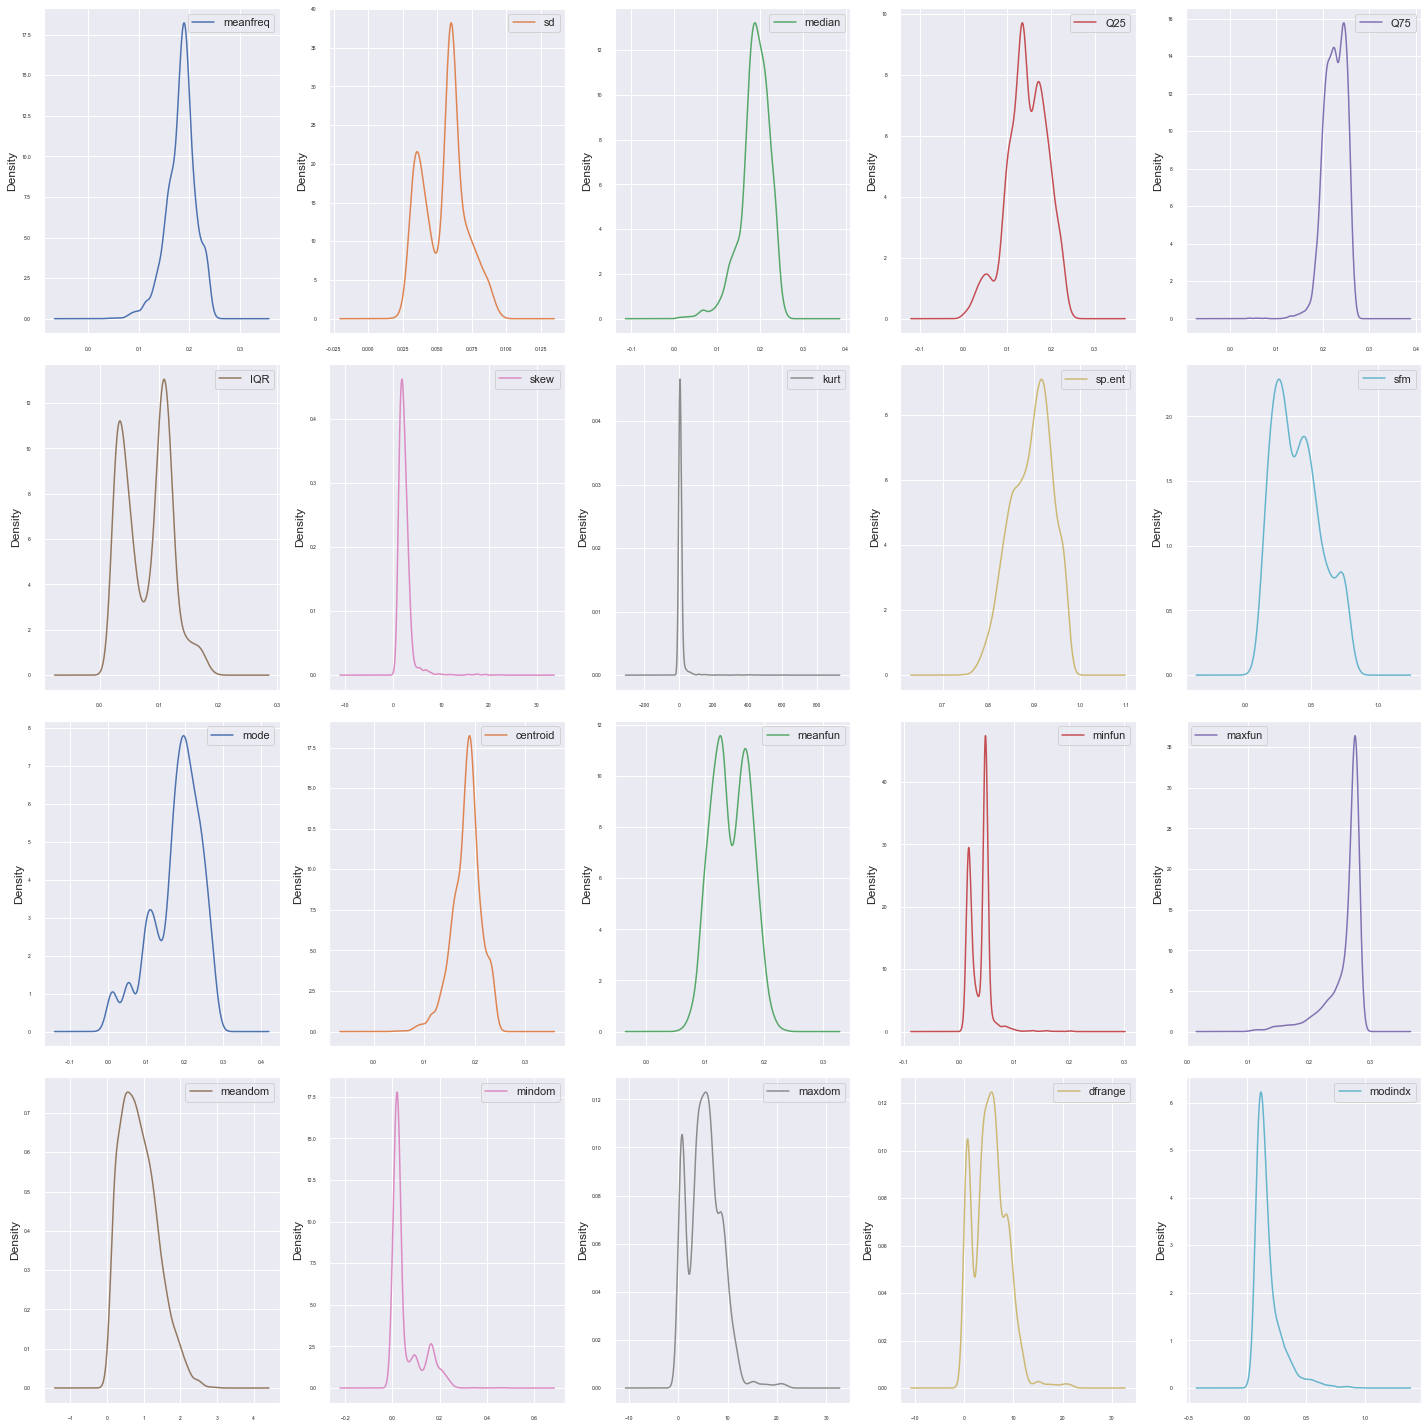

In [134]:
sns.set(style="darkgrid", font_scale=1, color_codes=True)
df[columns].plot(kind='density', subplots=True, layout=(4,5), sharex=False, legend=True, fontsize=5, figsize=(20,20))
plt.tight_layout()
plt.show()

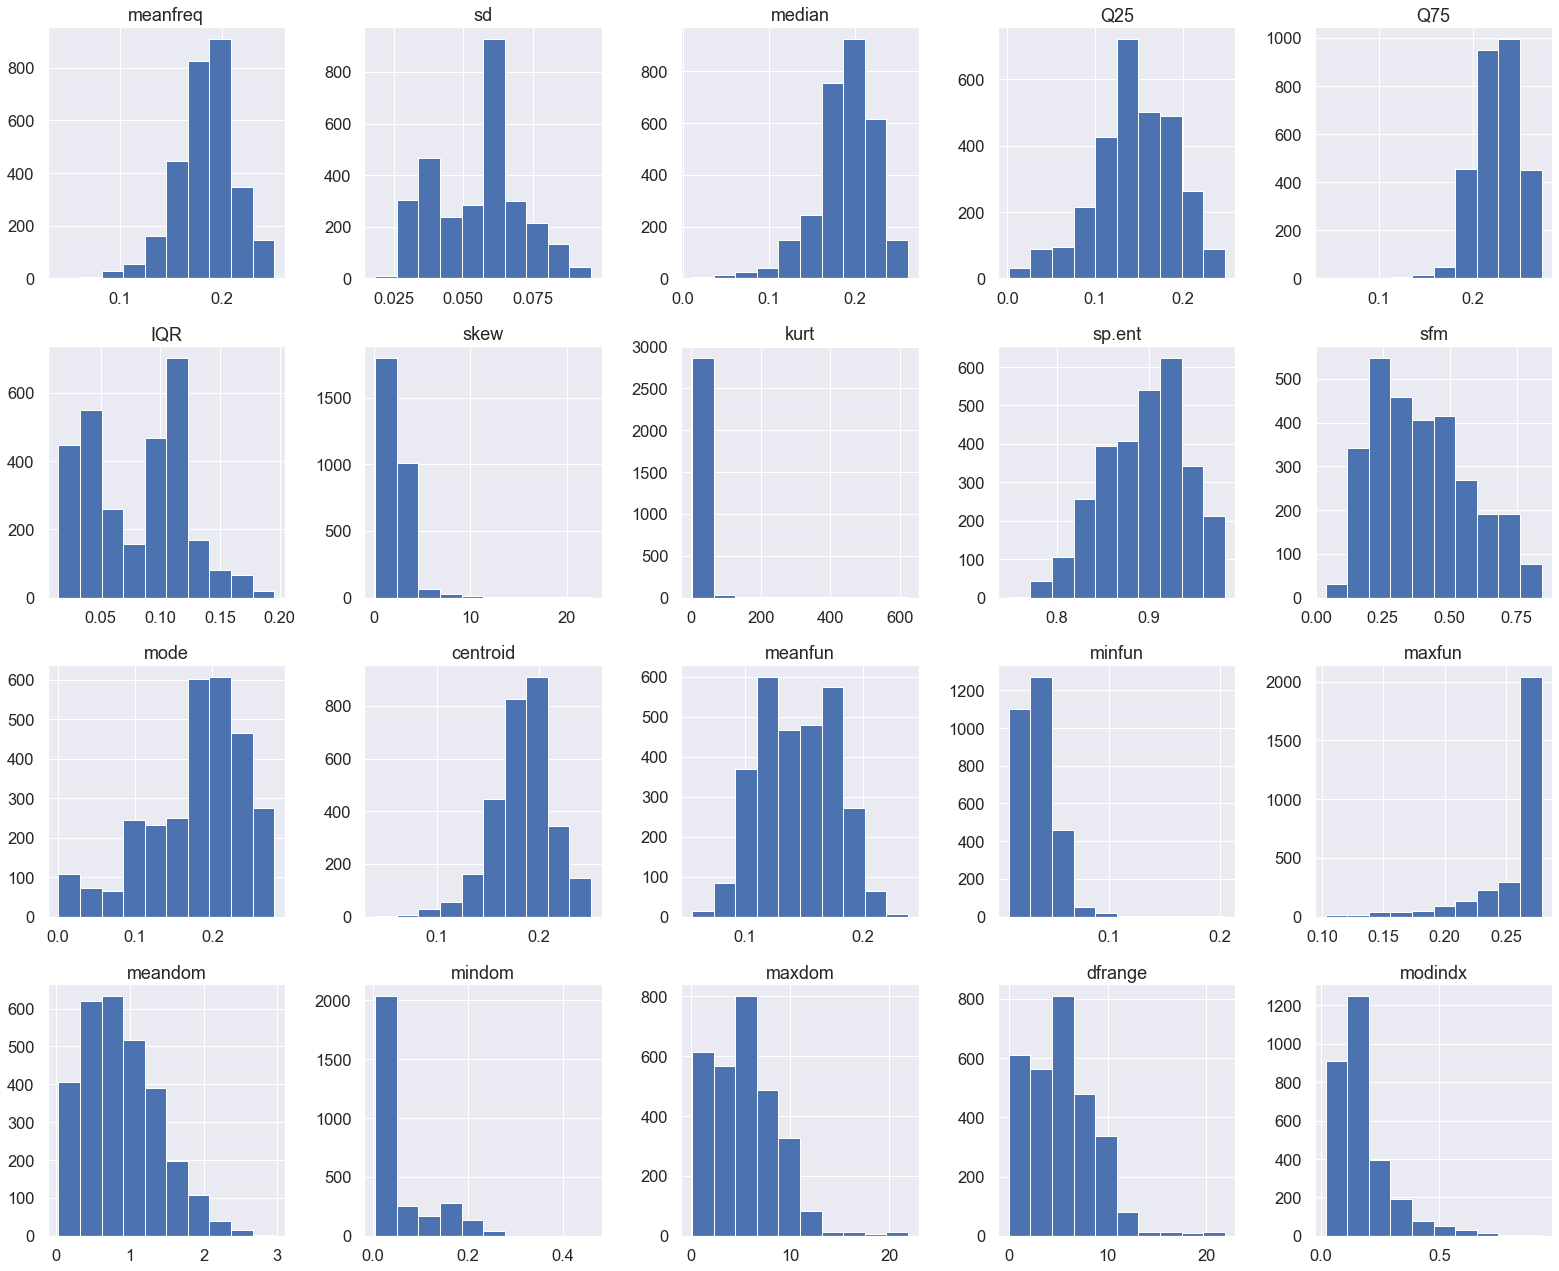

In [143]:
sns.set(style="darkgrid", font_scale=2, color_codes=True)
plt.figure(figsize=(22,18))
i=1
while i<=20:
    plt.subplot(4,5,i, )
    plt.hist(df[columns[i-1]])
    plt.title(columns[i-1])
    plt.tight_layout()
    i+=1

From the above subplots we notice that all the variables don't have any outliers in the data. 

## 5.3 Target Variable Analysis
<a id=section53></a>

Let us check plot a count plot to study the balance of Target Variable

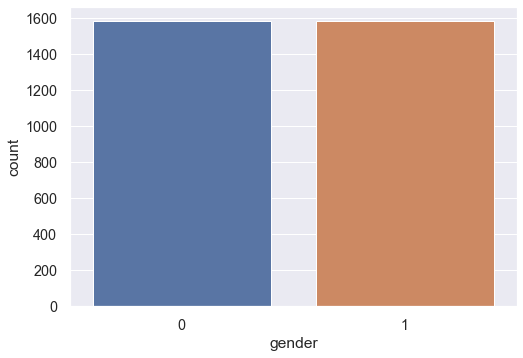

In [21]:
sns.set(style="darkgrid", font_scale=1.3, color_codes=True)
sns.countplot(df['gender'])

In [22]:
df['gender'].value_counts()

1    1583
0    1583
Name: gender, dtype: int64

From the above plot it is clear to us that the dataset is neatly balanced

## 5.4 Pandas Profiling
<a id=section54></a>

We will carry out a quick pandas profiling and understand if the dataset has any anomalies

In [23]:
profile=ProfileReport(df, minimal=True,explorative=True)

In [24]:
profile.to_file('Voice_prediction_dataset_pandas_profiling.html')

### Summary from Pandas Profile Report

- Dataset has 2 (0.1%) duplicate rows
- mode has 234 (7.4%) zeros
- dfrange has 63 (2.0%) zeros
- modindx has 63 (2.0%) zeros

## 5.5 Cleaning the data from the results of pandas profiling
<a id=section55></a>

#### Removing Duplicate Values

In [25]:
df.drop_duplicates(inplace=True) #deleting duplicate rows
df.reset_index(inplace=True) #resetting the index after deleting duplicate values
df.drop('index',axis =1,inplace=True )# deleting index which came out automatically

#### Deleting all zero value data from mode column

In [26]:
my_list=list(df[df['mode']==0].index)
df.drop(index=my_list, inplace=True)

#### Deleting all zero value data from dfrange column

In [27]:
my_list2=list(df[df['dfrange']==0].index)
df.drop(index=my_list2, inplace=True)

#### Deleting all zero value data from modindx column

In [28]:
my_list3=list(df[df['modindx']==0].index)
df.drop(index=my_list3, inplace=True)

#### Resetting the index

In [29]:
df.reset_index(inplace=True) #resetting the index
df.drop('index',axis =1,inplace=True )# deleting index which came out automatically

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype             
---  ------    --------------  -----             
 0   meanfreq  2926 non-null   float64           
 1   sd        2926 non-null   float64           
 2   median    2926 non-null   float64           
 3   Q25       2926 non-null   float64           
 4   Q75       2926 non-null   float64           
 5   IQR       2926 non-null   float64           
 6   skew      2926 non-null   float64           
 7   kurt      2926 non-null   float64           
 8   sp.ent    2926 non-null   float64           
 9   sfm       2926 non-null   float64           
 10  mode      2926 non-null   float64           
 11  centroid  2926 non-null   float64           
 12  meanfun   2926 non-null   float64           
 13  minfun    2926 non-null   float64           
 14  maxfun    2926 non-null   float64           
 15  meandom   2926 non-null   float64     

Now we have 2926 columns of clean dataset for analysis. But before we move forward, let us conduct one more round of pandas profiling

In [31]:
profile=ProfileReport(df, minimal=True,explorative=True)
profile.to_file('Voice_prediction_dataset_pandas_profiling_after_cleaning.html')

**Now our dataset is clean for Model development**

# 6. Dimensionality Reduction
<a id=section6></a>

Since the dataset contains 60 independent variables, it is very difficult to build our ML prediction model with such huge columns.

Therefore, in order to carry out our analysis and understand the features, we need to carry our dimensionality reduction and drop few features which are not very important for our model.

We will carry out dimensionality reduction in two ways;
- first by removing the columns which don't have any variance. If the column dont have any variation, then the column is not useful for our model.
- Second by doing PCA(Principal Component Analysis on the balance independent variable columns

### Selection of the features for Dimensionality Reduction

In [32]:
features=list(df.columns)
features.remove('gender')
print(features)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


In [33]:
df[features].head()

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374  1.232831   
1  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325  1.101174   
2  0.132786  0.079557  0.119090  0.067958  0.209592  0.141634  1.932562   
3  0.150762  0.074463  0.160106  0.092899  0.205718  0.112819  1.530643   
4  0.160514  0.076767  0.144337  0.110532  0.231962  0.121430  1.397156   

       kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0  4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
1  4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   
2  8.308895  0.963181  0.738307  0.112555  0.132786  0.110132  0.017112   
3  5.987498  0.967573  0.762638  0.086197  0.150762  0.105945  0.026230   
4  4.766611  0.959255  0.719858  0.128324  0.160514  0.093052  0.017758   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119  
1  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274  
2  0.253968  0.298222  0.007812  2.726562  2.718750  0.125160  
3  0.266667  0.479620  0.007812  5.312500  5.304688  0.123992  
4  0.144144  0.301339  0.007812  0.539062  0.531250  0.283937

In [34]:
df1=df[features].copy()

## 6.1 Variance Method
<a id=section61></a>

In [35]:
drop_cols=[]
for cols in df1.columns:
    if df1[cols].std()==0:
        drop_cols.append(cols)
print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
df1.drop(drop_cols,axis=1, inplace = True)

Number of constant columns to be dropped:  0
[]


We couldn't extract any column with 0 variance as none of the columns has standard deviation 0

## 6.2 Scaling the dataset
<a id=section62></a>

Before we move forward with **Model development,** we need to scale the data to have all the columns inline with each other. Eventhough the dataset values looks okay for model development, still we will scale it for better understanding 

### Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
df1_s=scaler.transform(df1)

In [38]:
df1_s

array([[-1.14533001,  1.06983182, -0.87914315, ..., -1.3976613 ,
        -1.38236844,  0.59289205],
       [-1.71348291,  1.51940247, -1.84356044, ...,  0.0359193 ,
         0.04992787,  0.26605091],
       [-1.79580734,  1.54565046, -2.00450543, ..., -0.76734094,
        -0.75261276, -0.43326763],
       ...,
       [-1.46884012,  2.58348928, -0.13547979, ..., -0.70590177,
        -0.69122863,  0.15233417],
       [-1.41231693,  2.25311472, -0.09948415, ..., -0.51475769,
        -0.50025579,  1.13040078],
       [-0.64161398,  2.39722729, -0.15535263, ..., -1.39993682,
        -1.38464193,  1.45852621]])

In [39]:
df1_s=pd.DataFrame(df1_s)
df1_s.head()

0         1         2         3         4         5         6  \
0 -1.145330  1.069832 -0.879143 -1.056374 -0.759012  0.756871 -0.734033   
1 -1.713483  1.519402 -1.843560 -1.447122 -0.840902  1.151647 -0.816158   
2 -1.795807  1.545650 -2.004505 -1.682562 -0.688866  1.505778 -0.297560   
3 -1.161758  1.220165 -0.818563 -1.136941 -0.854913  0.792649 -0.548266   
4 -0.817785  1.367370 -1.274522 -0.751187  0.270086  1.005751 -0.631532   

          7         8         9        10        11        12        13  \
0 -0.279330  1.548675  1.854144 -1.490377 -1.145330 -1.739313 -1.062412   
1 -0.274673  1.742771  2.171698 -1.170068 -1.713483 -1.190277 -1.107541   
2 -0.156321  1.545503  1.916572 -1.039733 -1.795807 -1.072676 -1.098108   
3 -0.225435  1.644246  2.053718 -1.453941 -1.161758 -1.204554 -0.623177   
4 -0.261784  1.457213  1.812579 -0.791939 -0.817785 -1.610578 -1.064470   

         14        15        16        17        18        19  
0 -0.292607 -1.348749 -0.748817 -1.397661 -1.382368  0.592892  
1  0.253360 -0.335877 -0.748817  0.035919  0.049928  0.266051  
2 -0.162615 -1.157146 -0.748817 -0.767341 -0.752613 -0.433268  
3  0.253360 -0.797812 -0.748817 -0.014142 -0.000089 -0.443093  
4 -3.760231 -1.150971 -0.748817 -1.404488 -1.389189  0.902673

## 6.3 Principal Component Analysis
<a id=section63></a>

**Principal component analysis (PCA)** is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

In order to get the principal components, let us first plot % variance v/s number of features in order to estimate how many features are giving least variation ad plant to drop them.

In [40]:
from sklearn.decomposition import PCA #import library
pca = PCA(n_components=20).fit(df1_s) #define the object

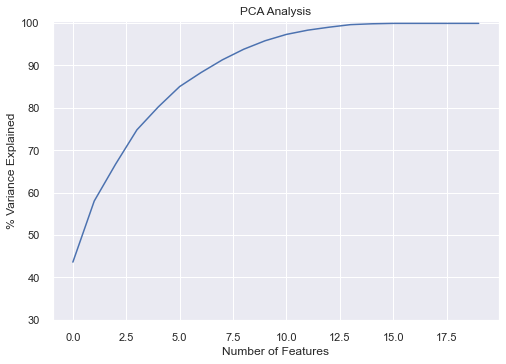

In [41]:
sns.set(style="darkgrid", font_scale=1, color_codes=True)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

From the above plot, we can see that out of the 20 independent features, 15 features contribute to 99% of the variance in the data and the balance 1% of variation is contributed by the balance 5 features. In other words, we can see that the first 15 Principal Components attribute for about 99% variation in the data. So let us drop these balance 30 features and move forward with our analysis.


**Doing this PAC operation on independent variables has reduced 5 features from the dataset thus reducing the computational time.**

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15).fit(df1_s) #selecting only 30 important features

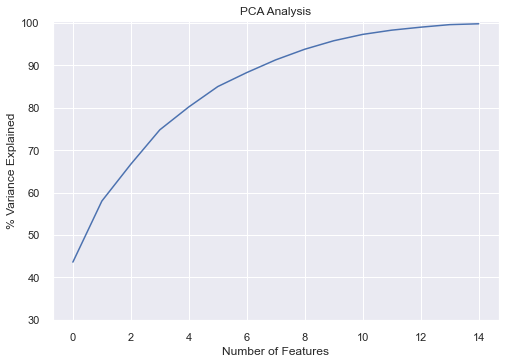

In [43]:
sns.set(style="darkgrid", font_scale=1, color_codes=True)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [44]:
print('%d components explain 99%% of the variation in the data' % pca.n_components_)

15 components explain 99% of the variation in the data


### Making the DataFrame of the selected 30 features

In [45]:
df2=pca.transform(df1)
df2=pd.DataFrame(df2)
df2.head()

0         1         2         3         4         5         6  \
0  0.266427  0.877840  2.469661  2.488060 -0.239740  1.286260  0.792648   
1 -1.947301 -2.126585  6.035091  0.978859 -2.542996  2.145908  1.094358   
2 -0.418593  1.029884  6.102858  3.967014 -1.249665  2.450787  1.082310   
3 -1.757882 -1.327476  6.771678  1.984594 -2.422035  2.383676  1.121802   
4  0.292333  1.128315  2.747629  2.806035 -0.313421  1.470263  0.796020   

          7         8         9        10        11        12        13  \
0  0.266232 -0.834387 -0.352886 -0.888345  0.268324  0.883370  1.461471   
1  0.559134 -2.127574  0.586776 -0.545580  3.531560  1.230264  1.842636   
2  0.238820 -1.783762 -0.173533 -0.926484  1.560746  1.769742  2.928182   
3  0.425583 -2.228254  0.507413 -0.652990  3.475926  1.487668  2.345771   
4  0.286487 -0.972078 -0.407344 -0.906181  0.146117  0.999636  1.612509   

         14  
0 -0.091132  
1  0.028568  
2 -0.059808  
3  0.024799  
4 -0.083817

# 7. Train Test Split
<a id=section7></a>

Before we move forward with **Scaling the Dataset and Model Development** let us divide the dataset for Train and Test data.
- We will use Train data to develop the model
- We will use Test data as tomorrow's unknown data to test our model behaviour

In [46]:
X=df2.copy()
X.head()

0         1         2         3         4         5         6  \
0  0.266427  0.877840  2.469661  2.488060 -0.239740  1.286260  0.792648   
1 -1.947301 -2.126585  6.035091  0.978859 -2.542996  2.145908  1.094358   
2 -0.418593  1.029884  6.102858  3.967014 -1.249665  2.450787  1.082310   
3 -1.757882 -1.327476  6.771678  1.984594 -2.422035  2.383676  1.121802   
4  0.292333  1.128315  2.747629  2.806035 -0.313421  1.470263  0.796020   

          7         8         9        10        11        12        13  \
0  0.266232 -0.834387 -0.352886 -0.888345  0.268324  0.883370  1.461471   
1  0.559134 -2.127574  0.586776 -0.545580  3.531560  1.230264  1.842636   
2  0.238820 -1.783762 -0.173533 -0.926484  1.560746  1.769742  2.928182   
3  0.425583 -2.228254  0.507413 -0.652990  3.475926  1.487668  2.345771   
4  0.286487 -0.972078 -0.407344 -0.906181  0.146117  0.999636  1.612509   

         14  
0 -0.091132  
1  0.028568  
2 -0.059808  
3  0.024799  
4 -0.083817

In [47]:
X.shape

(2926, 15)

In [48]:
y=pd.DataFrame(df['gender'])
y.head(2)

gender
0     1.0
1     1.0

In [49]:
y.shape

(2926, 1)

In [50]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [51]:
X_train.shape

(2194, 15)

The train dataset of independent features has 156 rows

In [52]:
y_train.shape

(2194, 1)

In [53]:
X_test.shape

(732, 15)

The test dataset of independent features has 52 rows

In [54]:
y_test.shape

(732, 1)

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 744 to 860
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2194 non-null   float64
 1   1       2194 non-null   float64
 2   2       2194 non-null   float64
 3   3       2194 non-null   float64
 4   4       2194 non-null   float64
 5   5       2194 non-null   float64
 6   6       2194 non-null   float64
 7   7       2194 non-null   float64
 8   8       2194 non-null   float64
 9   9       2194 non-null   float64
 10  10      2194 non-null   float64
 11  11      2194 non-null   float64
 12  12      2194 non-null   float64
 13  13      2194 non-null   float64
 14  14      2194 non-null   float64
dtypes: float64(15)
memory usage: 274.2 KB


In [56]:
y

gender
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
...      ...
2921     0.0
2922     0.0
2923     0.0
2924     0.0
2925     0.0

[2926 rows x 1 columns]

# 8 Machine Learning Models
<a id=section8></a>

Now we are ready with our data to develop few models for Machine Learning. Let us develop various Machine Learning Models starting with a Logistic Regression Model and understand the results from them.

To start with, we ill first develop simple Machine Learning Model and check for the accuracy to deduce if the model is overfitted or underfitted. After that we will use the technique of **hyper parameter tuning** and tune the existing model into a better model. Once it is done, we will evaluate this model and find out the accuracy, Recall Score and also plot the confusion matrix.

## 8.1 Logistic Regression
<a id=section81></a>

### 8.1.1 Model Development
<a id=section811></a>

In [57]:
from sklearn.linear_model import LogisticRegression #model importing
logreg=LogisticRegression() #defins object
logreg.fit(X_train, y_train) #training the function

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Printing the co-efficients

In [58]:
print('The co-efficients of Logistic regression models are:\n',logreg.coef_)

The co-efficients of Logistic regression models are:
 [[ 8.21215843 -6.92178851 -1.88665059  6.48522662 -8.54408017  2.72181594
  -7.56123215 -1.37711967  5.12560817 -3.4044403   2.64016604  1.23305914
  -1.15907199 -0.7373501   0.07769112]]


Printing Intercept

In [59]:
print('The intercept of Logistic Regression model is : ',logreg.intercept_[0])

The intercept of Logistic Regression model is :  2.601165028462441


Predicting the train and test outputs from the model

In [60]:
y_pred_train_lr=logreg.predict(X_train)
y_pred_test_lr=logreg.predict(X_test)

### 8.1.2 Developing Model Evaluation technique
<a id=section812></a>

#### Model Accuracy

<img align="center" src='https://miro.medium.com/max/563/1*CcRTQCFaGLzPid_994JsTQ.png' />

In [61]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train dataset is :',accuracy_score(y_train,y_pred_train_lr))
print('Accuracy score for test dataset is :',accuracy_score(y_test,y_pred_test_lr))

Accuracy score for train dataset is : 0.902461257976299
Accuracy score for test dataset is : 0.889344262295082


We will use the accuracy to understand if the model is overfitting or not

**Understanding the confusion matrix for the present dataset and checking what to optimize**

<img align="center" src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width='400' />



From the above graph on confusion matrix we can define the following for the present dataset;
- **False Positive** Actually it is Female but predicted as Male: We need to minimize this to get better prediction. The measurement of this error is called False Positive Rate. This must be as low as possible for a good model.
- **False Negative** Actual it is Male but detected as Female: We need to minimize this to get better prediction. We use a term called Recall. Recall must be as high as possible for the model to have best results. 

<img align="center" src='https://miro.medium.com/max/1403/1*szkTUgN5XmguA4c39YAKPQ.png' width='350'/>

**Recall and False Positive Rate**

**Recall** — Also called Sensitivity, Probability of Detection, True Positive Rate. The ratio of correct positive predictions to the total actual positive values.

<img align='center' src='https://miro.medium.com/max/700/1*Kiahw9yFpC5aUC_kQ4pfhA.png' width='350' />



<img align='center' src='https://miro.medium.com/max/700/1*E9wyILd1c_hT5GUqRdG3oA.png' width ='350' />




Therfore from the above argument, we can say that we need to build an optimum model by reducing **False Positive Rate (FPR) and Increasing True Positive Rate(TPR)**. This can be easily achieved by plotting the plot of TPR v/s FPR whereby the area under this curve (shown in green in below plot) must be as high as possible to have an excellent model.



<img align='center' src='https://miro.medium.com/max/361/1*pk05QGzoWhCgRiiFbz-oKQ.png' width='350' />

### 8.1.3 AUC ROC curve
<a id=section813></a>

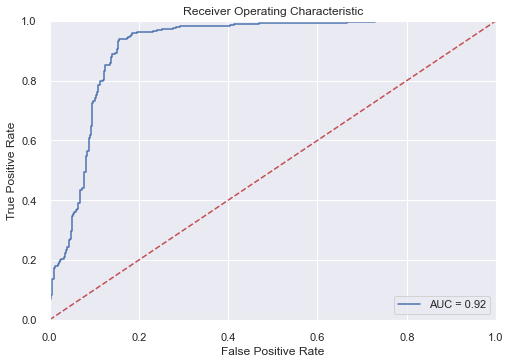

Area under ROC Curve is:  0.9155377890686293


In [62]:
from sklearn import metrics
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Area under ROC Curve is: ',roc_auc)

The simple logistic regression gave us an ara under the curve as 0.9155. Now let us futher tune this model and check if we can get bette results

### 8.1.4 Hyper Parameter Tuning
<a id=section814></a>

In [63]:
i=0.40
while i<=0.70:
    pred_lr=np.where(logreg.predict_proba(X_train)[:,1]>i,1,0)
    fpr, tpr, threshold = metrics.roc_curve(y_train, pred_lr)
    roc_auc = metrics.auc(fpr, tpr)
    print('Area under ROC Curve is with probability',i,'is :', roc_auc)
    i=i+0.02

Area under ROC Curve is with probability 0.4 is : 0.8802872779293366
Area under ROC Curve is with probability 0.42000000000000004 is : 0.8922341805842039
Area under ROC Curve is with probability 0.44000000000000006 is : 0.8969916494776765
Area under ROC Curve is with probability 0.4600000000000001 is : 0.9008641626189366
Area under ROC Curve is with probability 0.4800000000000001 is : 0.9023321578281988
Area under ROC Curve is with probability 0.5000000000000001 is : 0.9038275999733848
Area under ROC Curve is with probability 0.5200000000000001 is : 0.9030832058021159
Area under ROC Curve is with probability 0.5400000000000001 is : 0.8985794131346064
Area under ROC Curve is with probability 0.5600000000000002 is : 0.8881312795262492
Area under ROC Curve is with probability 0.5800000000000002 is : 0.8789556856743628
Area under ROC Curve is with probability 0.6000000000000002 is : 0.8678729456384324
Area under ROC Curve is with probability 0.6200000000000002 is : 0.8526706700379267
Area 

From the above output, we can notice that for probability of >50% we have maximum area under curve. The optimum value is 0.9038

In [64]:
pred_lr_train=np.where(logreg.predict_proba(X_train)[:,1]>0.5,1,0)
pred_lr_test=np.where(logreg.predict_proba(X_test)[:,1]>0.5,1,0)

### 8.1.5 Model Evaluation
<a id=section815></a>

#### Check for model fitting

In [65]:
print("Accuracy of the HP tuned, LR model train data is ", accuracy_score(y_train,pred_lr_train))
print("Accuracy of the HP tunes LR model test data is ", accuracy_score(y_test,pred_lr_test))

Accuracy of the HP tuned, LR model train data is  0.902461257976299
Accuracy of the HP tunes LR model test data is  0.889344262295082


#### AUC-ROC Curve

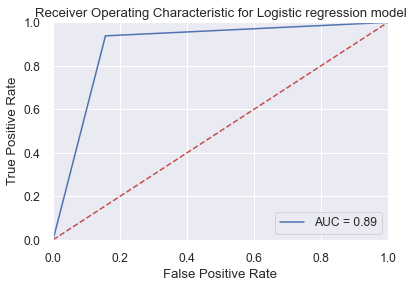

Area under ROC Curve is:  0.8907647476370157


In [147]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_lr_test)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
sns.set(style="darkgrid", font_scale=1.1, color_codes=True)
plt.title('Receiver Operating Characteristic for Logistic regression model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Area under ROC Curve is: ',roc_auc)

#### Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, pred_lr_test))
print('Confusion matrix for test data is :')

confusion_matrix.index=['Actual Female','Actual Male']
confusion_matrix.columns=['predicted Female','predicted Male']
print(confusion_matrix)

Confusion matrix for test data is :
               predicted Female  predicted Male
Actual Female               318              59
Actual Male                  22             333


#### Model Accuracy

In [68]:
print("Accuracy of the model is ", accuracy_score(y_test,pred_lr_test))

Accuracy of the model is  0.889344262295082


### 8.1.6 Model Summary
<a id=section816></a>

We have the final summary of the best model under Decision Tree section as under;


|Model Name||Train dataset Accuracy|| Test Dataset Accuracy|| Area under ROC for test data|
|------||-----------------------||------------------------||-------------------------|
|Logistic Regression||0.9024||0.8893||0.8907||


Therefore, simple hyperparameter tuning gave same results as that of simple model

## 8.2 Decision Tree
<a id=section82></a>

### 8.2.1 Model Development
<a id=section821></a>

In [69]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier( criterion='gini')
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
y_pred_train_dt=model_dt.predict(X_train)
y_pred_test_dt=model_dt.predict(X_test)

**Check for model fitting**

In [71]:
print("Accuracy of the model is ", accuracy_score(y_train,y_pred_train_dt))
print("Accuracy of the model is ", accuracy_score(y_test,y_pred_test_dt))

Accuracy of the model is  1.0
Accuracy of the model is  0.755464480874317


Clearly, we can say that this model is **Overfitted**. We need to hyperparameter tune the inputs and develop and better Decision tree model.

### 8.2.2 Hyperparameter Tuning
<a id=section822></a>

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
             

In [73]:
y_pred_train_dt2 = grid_search.predict(X_train)
y_pred_test_dt2 = grid_search.predict(X_test)

### 8.2.3 Model Evaluation
<a id=section823></a>

#### Check for fitting

In [74]:
print("Accuracy of the model is ", accuracy_score(y_train,y_pred_train_dt2))

Accuracy of the model is  0.9822242479489517


#### AUC-ROC Curve

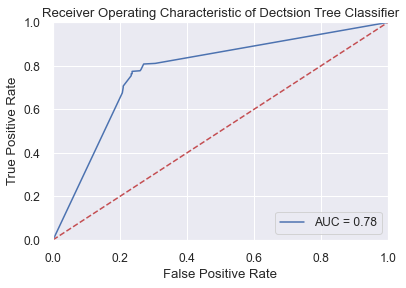

Area under ROC Curve is:  0.7754735308402136


In [152]:
from sklearn import metrics
probs = grid_search.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
sns.set(style="darkgrid", font_scale=1.1, color_codes=True)
plt.title('Receiver Operating Characteristic of Dectsion Tree Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Area under ROC Curve is: ',roc_auc)

#### Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt2))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

             predicted Rock  predicted Mine
Actual Rock             289              88
Actual Mine              84             271


#### Model Accuracy

In [77]:
print("Accuracy of the model is ", accuracy_score(y_test,y_pred_test_dt2))

Accuracy of the model is  0.7650273224043715


#### Plotting the Tree

In [78]:
#Importing libraries for visvalizing the Tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [79]:
#importing OS
import os
os.environ['PATH'] = os.environ['PATH'] + ';' + os.environ['CONDA_PREFIX'] + r"\Library\bin\graphviz"

In [80]:
#Generating DOT File
dot_data = export_graphviz(grid_search.best_estimator_, filled=True, rounded=True, feature_names=X.columns, out_file=None)
graph = graph_from_dot_data(dot_data)

In [81]:
#Converting DOT to PNG File
graph.write_png('tree.png')

True

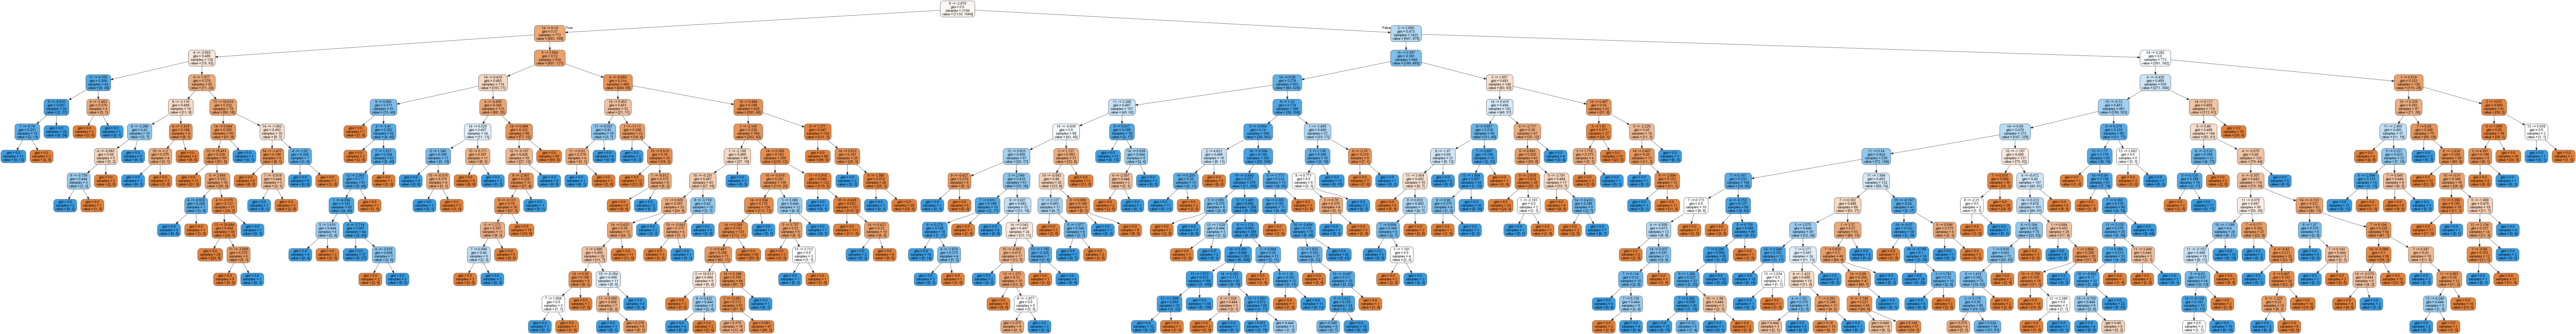

In [82]:
from PIL import Image  
# creating a object  
im = Image.open('tree.png')  
  
im

### 8.2.4 Model Summary
<a id=section824></a>

We have the final summary of the best model under Decision Tree section as under;


|Model Name||Train dataset Accuracy|| Test Dataset Accuracy|| Area under ROC for test data|
|------||-----------------------||------------------------||-------------------------|
|Decision Tree with GridSearchCV||0.9822||0.7650||0.7754|


## 8.3 Random Forest Model
<a id=section83></a>

### 8.3.1 Model Development
<a id=section831></a>

In [83]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state = 0)

model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [84]:
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

**Check for overfitting**

In [85]:
print("Accuracy of the model is ", accuracy_score(y_train,y_pred_train_rf))

Accuracy of the model is  1.0


Clearly we can see that our basic Random Forest model is **Overfitted**. Therefore let us use hyperparametertuning technique and develop a better model

### 8.3.2 Hyperparameter Tuning
<a id=section832></a>

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [10,20,30,40,50,100,150,200,300,400,500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(model_rf, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [87]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [88]:
y_pred_train_rf2 = random_search.predict(X_train)
y_pred_test_rf2 = random_search.predict(X_test)

In [89]:
print(random_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


### 8.3.3 Model Evaluation
<a id=section833></a>

#### Check for fitting

In [90]:
print("Accuracy of the model is ", accuracy_score(y_train,y_pred_train_rf2))

Accuracy of the model is  0.8058340929808568


#### AUC-ROC Curve

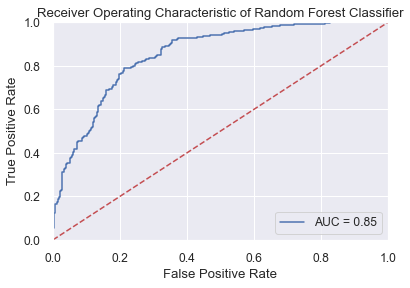

Area under ROC Curve is:  0.8538872492247916


In [151]:
from sklearn import metrics
probs_rf = random_search.predict_proba(X_test)
preds_rf = probs_rf[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_rf)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
sns.set(style="darkgrid", font_scale=1.1, color_codes=True)
plt.title('Receiver Operating Characteristic of Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Area under ROC Curve is: ',roc_auc)

#### Confusion Matrix

In [92]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf2))

confusion_matrix.index=['Actual Rock','Actual Mine']
confusion_matrix.columns=['predicted Rock','predicted Mine']
print(confusion_matrix)

             predicted Rock  predicted Mine
Actual Rock             285              92
Actual Mine              70             285


#### Model Accuracy

In [93]:
print("Accuracy of the model is ", accuracy_score(y_test,y_pred_test_rf2))

Accuracy of the model is  0.7786885245901639


### 8.3.4 Model Summary
<a id=section834></a>

We have the final summary of the best model under Decision Tree section as under;


|Model Name||Train dataset Accuracy|| Test Dataset Accuracy|| Area under ROC for test data|
|------||-----------------------||------------------------||-------------------------|
|Random Forest with RandomizedSearchCV||0.08072||0.7773||0.8522|


## 8.4 Naive Bayes Classifier
<a id=section84></a>

In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

### 8.4.1 Checking for Assumption for Naive Bayes
<a id=section841></a>

In [95]:
cor=X.corr()
cor[(cor>0.8) & (cor <-0.8)]

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
1  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
3  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
4  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
5  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
6  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
7  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
8  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
10 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
11 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
12 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
13 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
14 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN

naive Bayes Assumption is satisfied and now we can move forward with the model development

### 8.4.2 Model Development
<a id=section842></a>

In [96]:
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)
# predict using test data
y_pred_train_nb = model_nb.predict(X_train)
y_pred_test_nb = model_nb.predict(X_test)
# Compute predicted probabilities: y_pred_prob
y_pred_prob_nb = model_nb.predict_proba(X_test)

#### Check for model fitting

In [97]:
print("Accuracy score for train dataset: ", accuracy_score(y_train,y_pred_train_nb))
print("Accuracy score for test dataset: ", accuracy_score(y_test,y_pred_test_nb))

Accuracy score for train dataset:  0.5045578851412944
Accuracy score for test dataset:  0.49863387978142076


Simple Naive Bayes Model has yielded very low accuracy. Therefore we need to hyperparametertune it

### 8.4.3 Hyper Parameter tuning of Naive Bayes Model
<a id=section843></a>

In [98]:
i=0.40
while i<=0.90:
    pred_nb=np.where(model_nb.predict_proba(X_train)[:,1]>i,1,0)
    fpr, tpr, threshold = metrics.roc_curve(y_train, pred_nb)
    roc_auc = metrics.auc(fpr, tpr)
    print('Area under ROC Curve is with probability',i,'is :', roc_auc)
    i=i+0.05

Area under ROC Curve is with probability 0.4 is : 0.49020393905116777
Area under ROC Curve is with probability 0.45 is : 0.49020393905116777
Area under ROC Curve is with probability 0.5 is : 0.49064641692727395
Area under ROC Curve is with probability 0.55 is : 0.49064641692727395
Area under ROC Curve is with probability 0.6000000000000001 is : 0.49064641692727395
Area under ROC Curve is with probability 0.6500000000000001 is : 0.49017649211524383
Area under ROC Curve is with probability 0.7000000000000002 is : 0.49017649211524383
Area under ROC Curve is with probability 0.7500000000000002 is : 0.49061896999135
Area under ROC Curve is with probability 0.8000000000000003 is : 0.49061896999135
Area under ROC Curve is with probability 0.8500000000000003 is : 0.4910614478674562


From the above output, we can notice that there is no major change in ROC value with change in prediction probability. By evaluating closely, we can consider a probability of 60%

In [99]:
pred_nb_train=np.where(model_nb.predict_proba(X_train)[:,1]>0.6,1,0)
pred_nb_test=np.where(model_nb.predict_proba(X_test)[:,1]>0.6,1,0)

### 8.4.4 Model Evaluation
<a id=section844></a>

#### Check for model fitting

In [100]:
print("Accuracy of the model is ", accuracy_score(y_train,pred_nb_train))

Accuracy of the model is  0.5045578851412944


#### AUC-ROC Curve

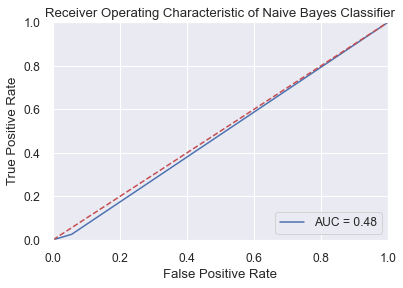

Area under ROC Curve is:  0.4848245974520865


In [153]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_nb_test)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
sns.set(style="darkgrid", font_scale=1.1, color_codes=True)
plt.title('Receiver Operating Characteristic of Naive Bayes Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Area under ROC Curve is: ',roc_auc)

#### Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, pred_nb_test))
print('Confusion matrix for test data is :')

confusion_matrix.index=['Actual Female','Actual Male']
confusion_matrix.columns=['predicted Female','predicted Male']
print(confusion_matrix)

Confusion matrix for test data is :
               predicted Female  predicted Male
Actual Female               356              21
Actual Male                 346               9


#### Model Accuracy

In [103]:
print("Accuracy of the model is ", accuracy_score(y_test,pred_nb_test))

Accuracy of the model is  0.49863387978142076


### 8.4.5 Model Summary
<a id=section845></a>

We have the final summary of the best model under Decision Tree section as under;


|Model Name||Train dataset Accuracy|| Test Dataset Accuracy|| Area under ROC for test data|
|------||-----------------------||------------------------||-------------------------|
|Logistic Regression||0.5055||0.4986||0.4848||


## 8.5 Support Vector Classifier
<a id=section85></a>

### 8.5.1 Model Development
<a id=section851></a>

In [104]:
from sklearn.svm import SVC
model_svc = SVC()

In [105]:
model_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [106]:
y_pred_train_svc = model_svc.predict(X_train)
y_pred_test_svc = model_svc.predict(X_test)

#### Check for model fitting

In [107]:
print("Accuracy score for train dataset: ", accuracy_score(y_train,y_pred_train_svc))
print("Accuracy score for test dataset: ", accuracy_score(y_test,y_pred_test_svc))

Accuracy score for train dataset:  0.6763901549680948
Accuracy score for test dataset:  0.674863387978142


We can see that the accuracy value is quite low and we ned to hyperparametertune the model for better results

### 8.5.2 Hyperparameter Tuning
<a id=section852></a>

In [108]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_svc = GridSearchCV(model_svc, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_svc.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.702, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.679, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.654, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.660, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.708, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.670, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.667, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.690, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.804, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.818, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.818, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.827, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.776, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.743, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.713, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.945, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.922, total=   0.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.852, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.841, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.870, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.863, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.826, total=   0.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   47.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [109]:
# print how our model looks after hyper-parameter tuning 
print(grid_svc.best_estimator_) 

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [110]:
y_grid_svc_predictions_train = grid_svc.predict(X_train) 
y_grid_svc_predictions_test = grid_svc.predict(X_test) 

### 8.5.3 Model Evaluation
<a id=section853></a>

#### Check for model fitting

In [111]:
print("Accuracy of the model is ", accuracy_score(y_train,y_grid_svc_predictions_train))


Accuracy of the model is  0.9831358249772105


#### AUC-ROC Curve

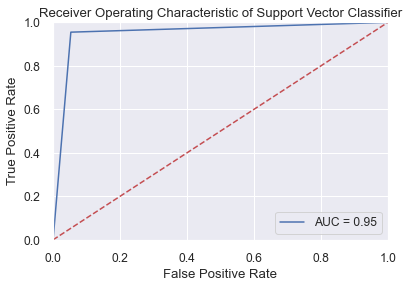

Area under ROC Curve is:  0.9509395897934023


In [154]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_grid_svc_predictions_test)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
sns.set(style="darkgrid", font_scale=1.1, color_codes=True)
plt.title('Receiver Operating Characteristic of Support Vector Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Area under ROC Curve is: ',roc_auc)

#### Confusion Matrix

In [113]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_grid_svc_predictions_test))
print('Confusion matrix for test data is :')

confusion_matrix.index=['Actual Female','Actual Male']
confusion_matrix.columns=['predicted Female','predicted Male']
print(confusion_matrix)

Confusion matrix for test data is :
               predicted Female  predicted Male
Actual Female               357              20
Actual Male                  16             339


#### False Positive Rate

In [114]:
FPR=(20)/(357+20)
print('False Positive Rate of SVM for test data is :', FPR)
#from sklearn.metrics import fpr
#print(fpr(y_test, y_grid_svc_predictions_test))

False Positive Rate of SVM for test data is : 0.05305039787798409


#### Model Accuracy

In [115]:
print("Accuracy of the model is ", accuracy_score(y_test,y_grid_svc_predictions_test))

Accuracy of the model is  0.9508196721311475


### 8.5.4 Model Summary
<a id=section854></a>

We have the final summary of the best model under Decision Tree section as under;


|Model Name||Train dataset Accuracy|| Test Dataset Accuracy|| Area under ROC for test data|
|------||-----------------------||------------------------||-------------------------|
|Support Vector with GridSearchCV||0.9831||0.9508||0.9509||


Therefore we can see that Support Vector with Grid Search CV model is giving us close to ideal conditions and we can consider this model as the best model so far.

## 8.6 K Nearest Neighbor
<a id=section86></a>

### 8.6.1 Model Development
<a id=section861></a>

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

In [117]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [118]:
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

In [119]:
print("Accuracy score for train dataset: ", accuracy_score(y_train,y_pred_train_knn))
print("Accuracy score for test dataset: ", accuracy_score(y_test,y_pred_test_knn))

Accuracy score for train dataset:  0.8577939835916135
Accuracy score for test dataset:  0.7431693989071039


### 8.6.2 Hyperparameter Tuning
<a id=section862></a>

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

def generate():
    param_dist = {"n_neighbors": range(1,30),                             #  specify parameters and distributions to sample from
                  "algorithm" : ["auto", "ball_tree"],
                  "leaf_size" :  2 ** np.arange(10),
                  "metric" : ["euclidean","manhattan","minkowski","chebyshev"]
                 }
    

    n_iter_search = 25
    knn_model = KNeighborsClassifier()
    
    return RandomizedSearchCV(knn_model,random_state = 0, param_distributions = param_dist,     
                                    n_iter = n_iter_search,
                                    n_jobs = -1)
knn_model2 = generate()
knn_model2.fit(X_train,y_train) 

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=25, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree'],
                                        'leaf_size': array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32),
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski', 'chebyshev'],
                                        'n_neighbors': range(1, 30)},
                   pre_dispatch='2*n_jobs', r

In [121]:
y_pred_train_knn2 = knn_model2.predict(X_train)
y_pred_test_knn2 = knn_model2.predict(X_test)

In [122]:
print("Accuracy score for train dataset: ", accuracy_score(y_train,y_pred_train_knn2))
print("Accuracy score for test dataset: ", accuracy_score(y_test,y_pred_test_knn2))

Accuracy score for train dataset:  0.8231540565177757
Accuracy score for test dataset:  0.7281420765027322


We can see that the hyperparameter tuned model gridsearch didnt give us better results. Therefore, let us try to get better results by tuning the nearest neighbours

### 8.6.3 Tuning for nearest K neighbors for maximum accuracy
<a id=section863></a>

In [123]:
from sklearn.metrics import accuracy_score
accuracy_list = []
def generate():
    for i in range(1,30):
        knn_model_ = KNeighborsClassifier(n_neighbors = i)
        knn_model_.fit(X_train, y_train)
        pred_i = knn_model_.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, pred_i))
    
    print("Maximum accuracy score for the corresponding value of k is",
          max([(v,i+1) for i,v in enumerate(accuracy_list)]),'respectively.')

generate()

Maximum accuracy score for the corresponding value of k is (0.7431693989071039, 3) respectively.


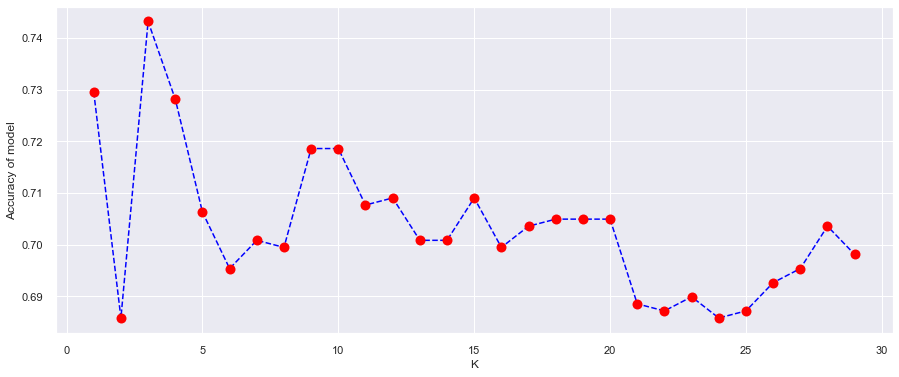

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
def generate():
    plt.figure(figsize=(15,6))
    plt.plot(range(1,30),accuracy_list,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
    plt.xlabel('K')
    plt.ylabel('Accuracy of model')
    plt.show()
generate()

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [126]:
y_pred_train_knn3 = knn3.predict(X_train)
y_pred_test_knn3 = knn3.predict(X_test)

### 8.6.4 Model Evaluation
<a id=section864></a>

#### Check for model fitting

In [127]:
print("Accuracy for the train dataset is ", accuracy_score(y_train,y_pred_train_knn3))
print("Accuracy for the test dataset is ", accuracy_score(y_test,y_pred_test_knn3))

Accuracy for the train dataset is  0.8577939835916135
Accuracy for the test dataset is  0.7431693989071039


#### AUC-ROC Curve

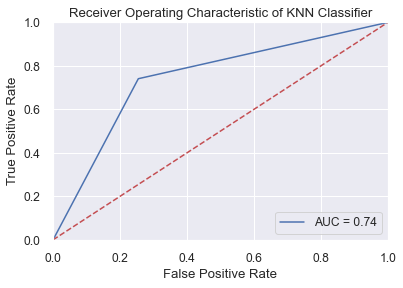

Area under ROC Curve is:  0.7431015803041059


In [155]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_test_knn3)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
sns.set(style="darkgrid", font_scale=1.1, color_codes=True)
plt.title('Receiver Operating Characteristic of KNN Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Area under ROC Curve is: ',roc_auc)

#### Confusion Matrix

In [129]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_knn3))
print('Confusion matrix for test data is :')

confusion_matrix.index=['Actual Female','Actual Male']
confusion_matrix.columns=['predicted Female','predicted Male']
print(confusion_matrix)

Confusion matrix for test data is :
               predicted Female  predicted Male
Actual Female               281              96
Actual Male                  92             263


#### Model Accuracy

In [130]:
print("Accuracy of the model is ", accuracy_score(y_test,y_pred_test_knn3))

Accuracy of the model is  0.7431693989071039


### 8.6.5 Model Summary
<a id=section865></a>

We have the final summary of the best model under **K Nearest Neighbor** section as under;


|Model Name||Train dataset Accuracy|| Test Dataset Accuracy|| Area under ROC for test data|
|------||-----------------------||------------------------||-------------------------|
|KNN||0.8577||0.7431||0.7431||


## 9. Final Summary
<a id=section9></a>

The summary of outputs by evaluating all the models are as under;

|Sl. No.||Model Name||Train dataset Accuracy|| Test Dataset Accuracy|| Area under ROC for test data|
|------||-----------------------||------------------------||-------------------------||----|
|1||Logistic Regression||0.9024||0.8893||0.8907|
|2||Decision Tree||0.9822||0.7650||0.7754|
|3||Random Forest||0.8044||0.7773||0.8522|
|4||Naive Bayes||0.5045||0.4986||0.4848|
|5||Support Vector||0.9831||0.9508||0.9509|
|6||KNN||0.8577||0.7431||0.7431||

In [131]:
print('The recall value of Support Vector Machine model for test dataset is :',recall_score(y_test, y_grid_svc_predictions_test))
print('The False Positive Rate of Support Vector Machine model for test dataset is :',FPR)

The recall value of Support Vector Machine model for test dataset is : 0.9549295774647887
The False Positive Rate of Support Vector Machine model for test dataset is : 0.05305039787798409


To summarize, we can say that **Support Vector Machines** model has behaved the best and has given maximum value for area under the ROC curve. This model has not only given best recall but also have given lowest False Positive Rate.

Therefore it is best to use this model for developing a voice recognition system.